# **Table of Contents**

## **1. Business Understanding**

## **2. Data Understanding**

## **3. Data Preprocessing**

### **3.1 Import Library**

In [44]:
# Scraping data from twitter
# import snscrape
import snscrape.modules.twitter as sntwitter

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Text preprocessing
import re
import string
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify import SklearnClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **3.2 Scrapping Data**

In [45]:
# # API
# api_key = "UcctOMgqRKStNA4qSUZ5AMQan"
# api_key_secret = "J9ScFPUN5dtovcuco31xZn0s0TB3oKLHUUop8kiu8W8QfueTTw"
# access_token = "2923944534-bV7LaWPsL5Blqtn7aLUQt3fbPCOvAz0oI9d9hbp"
# access_token_secret = "MA6MUgJc43m8XyjDdrmOMODQLoNx1rYEcFIP1aWfuA7CN"
# bearer_token = "AAAAAAAAAAAAAAAAAAAAAAKZmQEAAAAAe6G3iQXqblnt7I%2FQ6EU%2BR%2FtVd5Y%3Dah4BXNsdCZ90oQ9q4ui0J9m662PNiDzoWdO3ahodsvOxH2TUrM"
# client_id = "UXN1Q21ubjBxdHdYdmtpREdoYmM6MTpjaQ"
# client_secret = "BGuZcFso-C6XlG0Y4ffKI5jrTBGQaJ4RA_NX_47Y8HLMWG-88N"

In [46]:
# # Scrapping data from twitter with SNScrape
# scraper = sntwitter.TwitterSearchScraper('kemenkeu lang:id -filter:links')

# # Get the data
# tweet_df = []
# for i,tweet in enumerate(scraper.get_items()):
#     data = [
#         tweet.id,
#         tweet.user.username,
#         tweet.content,
#         tweet.date
#     ]

#     tweet_df.append(data)
#     if i > 2000:
#         break
    
# # Create dataframe
# tweet_df = pd.DataFrame(tweet_df, columns=['id', 'username', 'content', 'date'])
# tweet_df.head()

In [47]:
# # Save to csv
# import os.path
# tweet_df.to_csv(os.path.join('E:\KAMPUS\BERKAS - BERKAS\Skripsi\Dataset', 'tweet_df_kemenkeu.csv'), index=False)

### **3.3 Data Review & Cleaning**

#### **3.3.1 Data Review**

In [48]:
# Import dataset
df = pd.read_csv(r"E:\KAMPUS\BERKAS - BERKAS\Skripsi\Dataset\tweet_df_kemenkeu.csv")

In [49]:
# Shape of the data
print("Shape of the data: ", df.shape)

Shape of the data:  (2002, 4)


In [50]:
# Print the first 5 rows and show all content
pd.set_option('display.max_colwidth', None)

# # Show 5 random rows
# df.sample(5)

df.head()

,id,username,content,date
0,1643501639800848384,p023456,"@detikcom Gpp.. yg penting 946 org pegawai kemenkeu itu yg terlibat di 300 trilyun itu dipenjara dulu, baru lapor spt.",2023-04-05 06:31:40+00:00
1,1643500640474382338,masharyanto,"Seumpama Mario Dandy tidak berulah, akankan kemenkeu berubah?",2023-04-05 06:27:42+00:00
2,1643499560738918400,msaid_didu,"Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk ""merampok"" keuangan negara, sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah.",2023-04-05 06:23:24+00:00
3,1643498593280737282,SaifuddinSay,@DIDIK_RODENT @03__nakula @ex_AnakLolina Persis kayak transaksi ilegal 349 triliun di Kemenkeu. Maling2nya diangkat jadi pejabat? 🤭,2023-04-05 06:19:34+00:00
4,1643498491266891778,transproyekata,@Partono_ADjem @DitjenPajakRI @KemenkeuRI Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak. Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas.,2023-04-05 06:19:09+00:00


In [51]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2002 non-null   int64 
 1   username  2002 non-null   object
 2   content   2002 non-null   object
 3   date      2002 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.7+ KB


In [52]:
# Check null value
df.isnull().sum()

id          0
username    0
content     0
date        0
dtype: int64

In [53]:
# Check duplicate value
df.duplicated().sum()

0

In [54]:
# Check empty string in content column
df[df['content'] == '']

,id,username,content,date


**Simpulan**

Data yang diambil sebanyak 2002 baris dan 4 kolom.

In [55]:
# Drop column id and date in tweet_df
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,username,content
0,p023456,"@detikcom Gpp.. yg penting 946 org pegawai kemenkeu itu yg terlibat di 300 trilyun itu dipenjara dulu, baru lapor spt."
1,masharyanto,"Seumpama Mario Dandy tidak berulah, akankan kemenkeu berubah?"
2,msaid_didu,"Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk ""merampok"" keuangan negara, sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah."
3,SaifuddinSay,@DIDIK_RODENT @03__nakula @ex_AnakLolina Persis kayak transaksi ilegal 349 triliun di Kemenkeu. Maling2nya diangkat jadi pejabat? 🤭
4,transproyekata,@Partono_ADjem @DitjenPajakRI @KemenkeuRI Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak. Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas.


In [56]:
# # Export the new dataset to the new file
# df.to_csv('real_dataset_sentiment.csv', index=False)

In [57]:
# Import the new dataset
tweet_df = pd.read_csv(r'E:\KAMPUS\BERKAS - BERKAS\Skripsi\Dataset\real_dataset_sentiment.csv')

In [58]:
tweet_df.head()

,username,content,sentiment
0,p023456,"@detikcom Gpp.. yg penting 946 org pegawai kemenkeu itu yg terlibat di 300 trilyun itu dipenjara dulu, baru lapor spt.",Positif
1,masharyanto,"Seumpama Mario Dandy tidak berulah, akankan kemenkeu berubah?",Negatif
2,msaid_didu,"Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk ""merampok"" keuangan negara, sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah.",Positif
3,SaifuddinSay,@DIDIK_RODENT @03__nakula @ex_AnakLolina Persis kayak transaksi ilegal 349 triliun di Kemenkeu. Maling2nya diangkat jadi pejabat? 🤭,Negatif
4,transproyekata,@Partono_ADjem @DitjenPajakRI @KemenkeuRI Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak. Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas.,Positif


In [59]:
# Check null value in tweet_df
tweet_df.isnull().sum()

username     0
content      0
sentiment    0
dtype: int64

In [60]:
# Show negatif sentiment
negatif = tweet_df[tweet_df['sentiment'] == 'Negatif']
negatif.head()

,username,content,sentiment
1,masharyanto,"Seumpama Mario Dandy tidak berulah, akankan kemenkeu berubah?",Negatif
3,SaifuddinSay,@DIDIK_RODENT @03__nakula @ex_AnakLolina Persis kayak transaksi ilegal 349 triliun di Kemenkeu. Maling2nya diangkat jadi pejabat? 🤭,Negatif
6,Jak_kustar,@mulaigoyang @fajarnugros Kemenkeu bermasalah zaman Sby lgs dipecat akhirnya kabur ke Amrik. Skrg ditarik lagi 2 periode. Yg dibahas hambalang kerugian 8M apa ya lupa. Ini ratusan T. Wkwkwkwkwk makin mahir,Negatif
7,bonniebulb,@chenoa2104 @GeiszChalifah Intinya mau kriminalisasi Anies...lagi dicari2 motifnya... kenapa itu Kemenkeu yg segitu banyak trilyun ga dikerjain...jgn sampe kerja krn ada yg bayar ya,Negatif
11,AaGemss,"@KemenkeuRI Mau menarik simpati umat Islam? gak gini caranya bro haha\n\nKemenkeu ini ibarat orang yang udah mau tenggelam, apa aja dipegang dan dilakuin biar bisa selamat 🤣",Negatif


In [61]:
# Show positif sentiment
tweet_df[tweet_df['sentiment'] == 'Positif'].head(10)

,username,content,sentiment
0,p023456,"@detikcom Gpp.. yg penting 946 org pegawai kemenkeu itu yg terlibat di 300 trilyun itu dipenjara dulu, baru lapor spt.",Positif
2,msaid_didu,"Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk ""merampok"" keuangan negara, sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah.",Positif
4,transproyekata,@Partono_ADjem @DitjenPajakRI @KemenkeuRI Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak. Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas.,Positif
5,rudijntm,"@RamliRizal Buktiin om rizal 349T drmana aja, itu baru data awal dan itupun yg request juga dr internal kemenkeu sendiri untuk pengembangan kasus fraud",Positif
8,collegemenfess,"[cm] temen temen di sini ada yang ikutan magang kemenkeu waktu batch 1 kemarin ngga ya? kalau ada rep ya, aku mau nanya nanya\nterima kasih 🙏🏻",Positif
9,PajakBengkulu2,Acara ini ditujukan kepada para UMKM Binaan seluruh Instansi Kementerian Keuangan di Provinsi Bengkulu. KPP Pratama Bengkulu Dua bersama Kemenkeu Satu Bengkulu mendukung pemberdayaan UMKM di Provinsi Bengkulu.,Positif
10,CacingWormy,"@heru_hasnul @tukangbaca2000 @PartaiSocmed Kata siapa ada tekanan hebat? Kenapa sekarang ada kasus 349 T di kemenkeu, KPK gak ngambil kasus itu? Terus kalo seandainya gak ada kasus penganiayaan David, apakah KPK bisa nangkep Rafael? Selama ini KPK ngapain aja?",Positif
16,HaderaH4,"@kumparan Super betul pak. Usul saja : klw bs intenskan pengawasan, sapatau sj ada ""mmmm"" sprti yg dialami Kemenkeu.🤔",Positif
18,AuslanderDon,"kemenkeu, kominfo, esdm, bpkp",Positif
19,ViezIkmar,@AqiaqiH Formula E terus di ributin..sementara Kasus 349 T di Kemenkeu di suruh stop...,Positif


#### **3.3.2 Content/Text Cleaning**
1. Remove URL
2. Remove Mentions
2. Remove HTML Tag
3. Remove Number
4. Remove Punctuation
5. Remove Whitespace Leading & Trailing
6. Remove Emoji

In [62]:
# Check duplicate
tweet_df.duplicated().sum()

0

In [63]:
# Remove url from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'http\S+', '', case=False)

# Remove User Mentions from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'@\S+', '', case=False)

# Remove HTML tag from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'<.*?>', '', case=False)

# Remove number from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'\d+', '', case=False)

# Remove punctuation from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'[^\w\s]', '', case=False)

# Remove whitespace from content column
tweet_df['content'] = tweet_df['content'].str.replace(r'\s+', ' ', case=False)

# Remove Emojis from content column
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

tweet_df['content'] = tweet_df['content'].apply(remove_emoji)

<ipython-input-63-e029475d1b15>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-63-e029475d1b15>:5: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-63-e029475d1b15>:8: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-63-e029475d1b15>:11: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-63-e029475d1b15>:14: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-63-e029475d1b15>:17: FutureWarning:

The default value of regex will change from True to False in a future version.



In [64]:
# Shape of the data
print("Shape of the data: ", tweet_df.shape)

Shape of the data:  (2002, 3)


In [65]:
tweet_df.head()

,username,content,sentiment
0,p023456,Gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif
1,masharyanto,Seumpama Mario Dandy tidak berulah akankan kemenkeu berubah,Negatif
2,msaid_didu,Sepertinya pengembangan opini akan kehebatan Ibu Sri Mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara Bu Sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif
3,SaifuddinSay,Persis kayak transaksi ilegal triliun di Kemenkeu Malingnya diangkat jadi pejabat,Negatif
4,transproyekata,Mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak Biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah Kemenkeu atau dikbudnas,Positif


### **3.4 Content Preprocessing**

#### **3.4.1 Another Cleaning**

In [66]:
# Case folding
tweet_df['content'] = tweet_df['content'].str.lower()
tweet_df.head()

,username,content,sentiment
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif


In [67]:
# Tokenizing
tweet_df['token'] = tweet_df['content'].apply(word_tokenize)
tweet_df.head()

,username,content,sentiment,token
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[gpp, yg, penting, org, pegawai, kemenkeu, itu, yg, terlibat, di, trilyun, itu, dipenjara, dulu, baru, lapor, spt]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, tidak, berulah, akankan, kemenkeu, berubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[sepertinya, pengembangan, opini, akan, kehebatan, ibu, sri, mulyani, dimanfaatkan, oleh, pegawai, kemenkeu, yg, nakal, untuk, merampok, keuangan, negara, sementara, bu, sri, menikmati, pujian, tsb, dan, lalai, mengawasi, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, di, kemenkeu, malingnya, diangkat, jadi, pejabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[mereka, ini, juga, gak, kalah, sengsara, kerja, lembur, sampe, malam, kayak, petugas, pajak, biji, mata, sama², melotot, depan, monitor, harusnya, dirayakan, juga, dengan, apresiasi, tinggi, dari, entah, kemenkeu, atau, dikbudnas]"


In [68]:
# Open slang word dictionary in txt format
%time
import json

with open(r"E:\KAMPUS\BERKAS - BERKAS\Skripsi\Workstation\NLP_bahasa_resources\combined_slang_words.txt", 'r') as f:
    data = f.read()
        
# Print the dictionary
print(type(data))

# Reconstruct the dictionary
slang_words = json.loads(data)
print(type(slang_words))
# print(slang_words["yg"])

# print(tweet_df.token[0][1])

# Replace slang word with the original word in token column
for i in slang_words:
    for j in range(len(tweet_df)):
        for k in range(len(tweet_df.token[j])):
            if i == tweet_df.token[j][k]:
                tweet_df.token[j][k] = slang_words[i]

# print(len(tweet_df))

# Check the data
tweet_df.head()

Wall time: 965 µs
<class 'str'>
<class 'dict'>


,username,content,sentiment,token
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[tidak apa-apa, yang, penting, orang, pegawai, kemenkeu, itu, yang, terlibat, di, trilyun, itu, dipenjara, dulu, baru, lapor, seperti]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, tidak, berulah, akankan, kemenkeu, berubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[sepertinya, pengembangan, opini, akan, kehebatan, ibu, sri, mulyani, dimanfaatkan, oleh, pegawai, kemenkeu, yang, nakal, untuk, merampok, keuangan, negara, sementara, bu, sri, menikmati, pujian, tsb, dan, lalai, mengawasi, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, di, kemenkeu, malingnya, diangkat, jadi, pejabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[mereka, ini, juga, gak, kalah, sengsara, kerja, lembur, sampai, malam, kayak, petugas, pajak, biji, mata, sama², melotot, depan, monitor, harusnya, dirayakan, juga, dengan, apresiasi, tinggi, dari, entah, kemenkeu, atau, dikbudnas]"


In [69]:
# Check stopwords in Bahasa Indonesia
stopwords = stopwords.words('indonesian')
print(len(stopwords))
print(stopwords)

# Remove stopwords
tweet_df['token'] = tweet_df['token'].apply(lambda x: [item for item in x if item not in stopwords])
tweet_df.head()

758
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeingi

,username,content,sentiment,token
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[tidak apa-apa, orang, pegawai, kemenkeu, terlibat, trilyun, dipenjara, lapor]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, berulah, akankan, kemenkeu, berubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[pengembangan, opini, kehebatan, sri, mulyani, dimanfaatkan, pegawai, kemenkeu, nakal, merampok, keuangan, negara, bu, sri, menikmati, pujian, tsb, lalai, mengawasi, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, kemenkeu, malingnya, diangkat, pejabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[gak, kalah, sengsara, kerja, lembur, malam, kayak, petugas, pajak, biji, mata, sama², melotot, monitor, dirayakan, apresiasi, kemenkeu, dikbudnas]"


In [70]:
# Stemming with Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

tweet_df['stem'] = tweet_df['token'].apply(lambda x: [stemmer.stem(item) for item in x])
tweet_df.head()

,username,content,sentiment,token,stem
0,p023456,gpp yg penting org pegawai kemenkeu itu yg terlibat di trilyun itu dipenjara dulu baru lapor spt,Positif,"[tidak apa-apa, orang, pegawai, kemenkeu, terlibat, trilyun, dipenjara, lapor]","[tidak apa, orang, pegawai, kemenkeu, libat, trilyun, penjara, lapor]"
1,masharyanto,seumpama mario dandy tidak berulah akankan kemenkeu berubah,Negatif,"[seumpama, mario, dandy, berulah, akankan, kemenkeu, berubah]","[umpama, mario, dandy, ulah, akan, kemenkeu, ubah]"
2,msaid_didu,sepertinya pengembangan opini akan kehebatan ibu sri mulyani dimanfaatkan oleh pegawai kemenkeu yg nakal untuk merampok keuangan negara sementara bu sri menikmati pujian tsb dan lalai mengawasi anak buah,Positif,"[pengembangan, opini, kehebatan, sri, mulyani, dimanfaatkan, pegawai, kemenkeu, nakal, merampok, keuangan, negara, bu, sri, menikmati, pujian, tsb, lalai, mengawasi, anak, buah]","[kembang, opini, hebat, sri, mulyani, manfaat, pegawai, kemenkeu, nakal, rampok, uang, negara, bu, sri, nikmat, puji, tsb, lalai, awas, anak, buah]"
3,SaifuddinSay,persis kayak transaksi ilegal triliun di kemenkeu malingnya diangkat jadi pejabat,Negatif,"[persis, kayak, transaksi, ilegal, triliun, kemenkeu, malingnya, diangkat, pejabat]","[persis, kayak, transaksi, ilegal, triliun, kemenkeu, maling, angkat, jabat]"
4,transproyekata,mereka ini juga gak kalah sengsara kerja lembur sampe malam kayak petugas pajak biji mata sama² melotot depan monitor harusnya dirayakan juga dengan apresiasi tinggi dari entah kemenkeu atau dikbudnas,Positif,"[gak, kalah, sengsara, kerja, lembur, malam, kayak, petugas, pajak, biji, mata, sama², melotot, monitor, dirayakan, apresiasi, kemenkeu, dikbudnas]","[gak, kalah, sengsara, kerja, lembur, malam, kayak, tugas, pajak, biji, mata, sama, melotot, monitor, raya, apresiasi, kemenkeu, dikbudnas]"


In [71]:
# Export the dataset
tweet_df.to_csv(os.path.join('E:\KAMPUS\BERKAS - BERKAS\Skripsi\Dataset', 'real_dataset_sentiment_cleaned.csv'), index=False)

#### **3.4.2 Data Visualization**

In [72]:
# Most common positive word
from collections import Counter

positive = tweet_df[tweet_df['sentiment'] == 'Positif']
# positive["temp_list"] = positive.apply(lambda x:str(x).split())

top = Counter([item for sublist in positive['stem'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')


,Common_words,count
0,kemenkeu,842
1,t,118
2,mahfud,95
3,uang,94
4,pajak,90
5,pegawai,86
6,data,85
7,ga,85
8,iya,84
9,orang,77


In [73]:
# Most common negative words
negative = tweet_df[tweet_df['sentiment'] == 'Negatif']
# negative["temp_list"] = negative.apply(lambda x:str(x).split())
# print (negative)
print("Most Common Negative Words")  # most common negative word in tweets
top = Counter([item for sublist in negative['stem'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

Most Common Negative Words


,Common_words,count
0,kemenkeu,1165
1,t,194
2,ga,183
3,iya,157
4,orang,140
5,pegawai,137
6,gak,136
7,pajak,123
8,uang,117
9,nya,108


In [74]:
# Pie chart for sentiment, blue color for positif and red color for negatif
fig_pie = px.pie(tweet_df, names='sentiment', color="sentiment", title='Pie chart of different sentiments of tweets')
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()

In [75]:
# The distribution of sentiments using px, blue color for positif and red color for negatif
fig_hist = px.histogram(tweet_df, x="sentiment", color="sentiment", title='Histogram of different sentiments of tweets')

# add value label
fig_hist.update_traces(texttemplate='%{value}', textposition='outside')
fig_hist.show()

In [76]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

X = tweet_df['stem']

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(tweet_df['sentiment'])

print(X[0])
print(Y[0])

# Print unique value in Y
print(np.unique(Y))

['tidak apa', 'orang', 'pegawai', 'kemenkeu', 'libat', 'trilyun', 'penjara', 'lapor']
1
[0 1]


In [77]:
# Print size of positive and negative sentiment
print("Positive: ", len(tweet_df[tweet_df['sentiment'] == 'Positif']))
print("Negative: ", len(tweet_df[tweet_df['sentiment'] == 'Negatif']))

Positive:  840
Negative:  1162


#### **3.4.3 WordCloud**

In [78]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

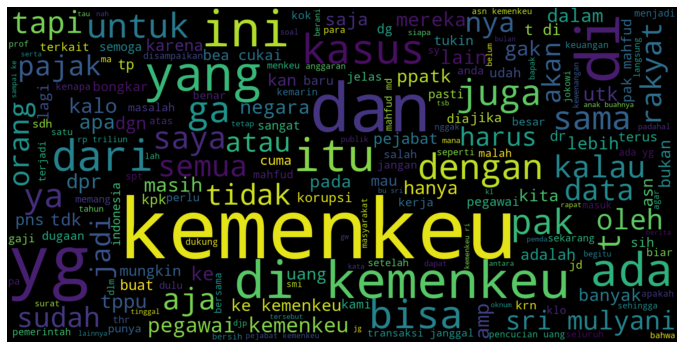

In [79]:
# Wordcloud for positif sentiment
positive = tweet_df[tweet_df['sentiment'] == 'Positif']
positive = positive['content'].str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(positive)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

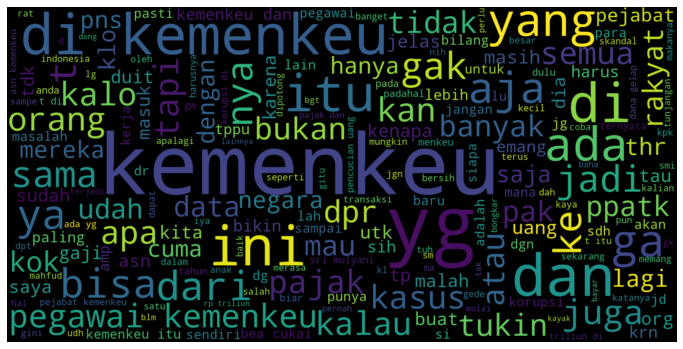

In [80]:
# Wordcloud for negatif sentiment
negative = tweet_df[tweet_df['sentiment'] == 'Negatif']
negative = negative['content'].str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(negative)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **4. Modelling**

### **4.1 With LSTM**

In [81]:
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing
from sklearn.model_selection import train_test_split

# Import classification_report, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report, f1_score, accuracy_score

In [82]:
# Tokenize words
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tweet_df['content'])
list_tokenized_train = tokenizer.texts_to_sequences(tweet_df['content'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Pad sequences with zeros to make them all the same length (maxlen).
max_length = 50
X_t = pad_sequences(list_tokenized_train, maxlen=max_length)
print('Shape of data tensor:', X_t.shape)

# Split into train and test set in ratio 8:2 for training/testing
X_train, X_test, y_train, y_test = train_test_split(X_t, Y, test_size=0.2, random_state=45)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

Found 8169 unique tokens.
Shape of data tensor: (2002, 50)
(1601, 50) (1601,)
(401, 50) (401,)


#### **Train the models**

In [83]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('accuracy') > 0.95:
            print('\n Stopped Training!\n')
            self.model.stop_training = True
            
def train_model(model, model_name, n_epochs, batch_size, X_data, y_data, validation_split):    
    checkpoint_path = model_name+"_cp-{epoch:04d}.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,  save_weights_only=True, verbose=1)
    callbacks = myCallback()
    history = model.fit(
        X_data,
        y_data,
        steps_per_epoch=batch_size,
        epochs=n_epochs,
        validation_split=validation_split,
        verbose=1,
        callbacks=[cp_callback]
    )
    return history

In [84]:
# Generate graph
def generate_graph(history):
    plt.plot(history.history['accuracy'], 'b')
    plt.plot(history.history['val_accuracy'], 'r')
    plt.title('Model Accuracy'),
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [85]:
# Plot a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes) 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black") 
    plt.tight_layout()
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')

**Model A**

In [86]:
# # Model A
# class Model_A():
#     def __new__(self):
#         inp = Input(shape=(max_length, ))
#         embed_size = 128
#         x = Embedding(max_features, embed_size)(inp)
#         x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
#         x = GlobalMaxPool1D()(x)
#         x = Dropout(0.1)(x)
#         x = Dense(50, activation="relu")(x)
#         x = Dropout(0.1)(x)
#         x = Dense(1, activation="sigmoid")(x)
#         model = Model(inputs=inp, outputs=x)
#         model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
        
#         return model
    
# model_a = Model_A()
# print(model_a.summary())

In [87]:
# Train model
history_a = train_model(model_a, 'model_a', 10, 32, X_train, y_train, 0.1)

# Generate graph
generate_graph(history_a)

NameError: name 'model_a' is not defined

**Model B**

In [ ]:
# Model B
class Model_B():
    def __new__(self):
        inp = Input(shape=(max_length, ))
        x = Embedding(max_features, 128)(inp)
        x = SpatialDropout1D(0.25)(x)
        x = LSTM(100, dropout=0.5)(x)
        x = Dropout(0.5)(x)
        x = Dense(1, activation='sigmoid')(x)
        model = Model(inputs=inp, outputs=x)
        model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
        return model
    
model_b = Model_B()
print(model_b.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 128)           768000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                           

Epoch 1/10
31/32 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.5692
Epoch 1: saving model to model_b_cp-0001.ckpt
32/32 [==============================] - 4s 81ms/step - loss: 0.6841 - accuracy: 0.5681 - val_loss: 0.6723 - val_accuracy: 0.5901
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.6635 - accuracy: 0.5840
Epoch 2: saving model to model_b_cp-0002.ckpt
32/32 [==============================] - 2s 62ms/step - loss: 0.6635 - accuracy: 0.5840 - val_loss: 0.6672 - val_accuracy: 0.6025
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.5784 - accuracy: 0.7167
Epoch 3: saving model to model_b_cp-0003.ckpt
32/32 [==============================] - 2s 58ms/step - loss: 0.5784 - accuracy: 0.7167 - val_loss: 0.6801 - val_accuracy: 0.5963
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8347
Epoch 4: saving model to model_b_cp-0004.ckpt
32/32 [==============================] - 2s 67ms/s

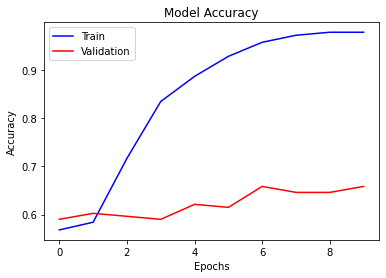

In [ ]:
# Train model
history_b = train_model(model_b, 'model_b', 10, 32, X_train, y_train, 0.1)

# Generate graph
generate_graph(history_b)

**Model C**

In [ ]:
# Model C
class Model_C():
  def __new__(self):
    embed_size = 128
    model = Sequential()
    model.add(Embedding(max_features, embed_size))
    model.add(Bidirectional(LSTM(75, return_sequences = True)))
    model.add(GlobalMaxPool1D())
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.03))
    model.add(Dense(8, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model
    
model_c = Model_C()
print(model_c.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         768000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 150)        122400    
 l)                                                              
                                                                 
 global_max_pooling1d_1 (Glo  (None, 150)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 16)                2416      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 1

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5750
Epoch 1: saving model to model_c_cp-0001.ckpt
32/32 [==============================] - 6s 95ms/step - loss: 0.6833 - accuracy: 0.5750 - val_loss: 0.6758 - val_accuracy: 0.5901
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.6514 - accuracy: 0.5931
Epoch 2: saving model to model_c_cp-0002.ckpt
32/32 [==============================] - 2s 72ms/step - loss: 0.6514 - accuracy: 0.5931 - val_loss: 0.6656 - val_accuracy: 0.6087
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.4929 - accuracy: 0.8167
Epoch 3: saving model to model_c_cp-0003.ckpt
32/32 [==============================] - 3s 80ms/step - loss: 0.4929 - accuracy: 0.8167 - val_loss: 0.8117 - val_accuracy: 0.5590
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.4394 - accuracy: 0.8625
Epoch 4: saving model to model_c_cp-0004.ckpt
32/32 [==============================] - 3s 79ms/s

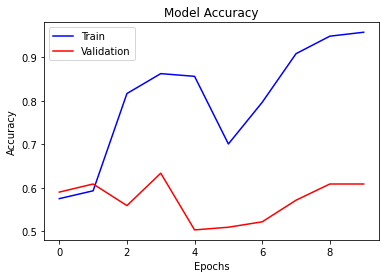

In [ ]:
# Train model
history_c = train_model(model_c, 'model_c', 10, 32, X_train, y_train, 0.1)

# Generate graph
generate_graph(history_c)

**Model D**

In [ ]:
# Model D
class Model_D():
  def __new__(self):
    embed_size = 64
    model = Sequential()
    model.add(Embedding(max_features, embed_size))
    model.add(LSTM(50, return_sequences = True))
    model.add(GlobalMaxPool1D())
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.8))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model_d = Model_D()
print(model_d.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          384000    
                                                                 
 lstm_2 (LSTM)               (None, None, 50)          23000     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 16)                816       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                      

Epoch 1/10
30/32 [===========================>..] - ETA: 0s - loss: 0.6883 - accuracy: 0.5659
Epoch 1: saving model to model_d_cp-0001.ckpt
32/32 [==============================] - 3s 52ms/step - loss: 0.6878 - accuracy: 0.5667 - val_loss: 0.6803 - val_accuracy: 0.5901
Epoch 2/10
31/32 [============================>.] - ETA: 0s - loss: 0.6807 - accuracy: 0.5792
Epoch 2: saving model to model_d_cp-0002.ckpt
32/32 [==============================] - 1s 36ms/step - loss: 0.6805 - accuracy: 0.5826 - val_loss: 0.6777 - val_accuracy: 0.5901
Epoch 3/10
31/32 [============================>.] - ETA: 0s - loss: 0.6782 - accuracy: 0.5814
Epoch 3: saving model to model_d_cp-0003.ckpt
32/32 [==============================] - 1s 37ms/step - loss: 0.6778 - accuracy: 0.5840 - val_loss: 0.6734 - val_accuracy: 0.5901
Epoch 4/10
31/32 [============================>.] - ETA: 0s - loss: 0.6557 - accuracy: 0.6122
Epoch 4: saving model to model_d_cp-0004.ckpt
32/32 [==============================] - 1s 36ms/s

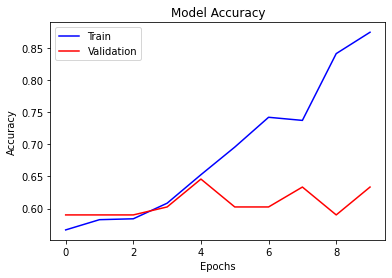

In [ ]:
# Train model
history_d = train_model(model_d, 'model_d', 10, 32, X_train, y_train, 0.1)

# Generate graph
generate_graph(history_d)

#### **Evaluate the models**

In [ ]:
# Predict function, plot confusion matrix and return accuracy score
def predict(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).astype(int)
    print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
    print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Negative','Positive'])
    # Plot the confusion matrix for a given classifier and dataset
    plt.show()
    # Return the accuracy score
    return accuracy_score(y_test, y_pred)

**Random Forest**

In [ ]:
# # Modelling with Random Forest
# from sklearn.ensemble import RandomForestClassifier

# # Create the model with 100 trees
# model_random_forest = RandomForestClassifier(n_estimators = 150, 
#                                              random_state=45, 
#                                              bootstrap = "False", 
#                                              criterion="gini", 
#                                              min_samples_split = 10, 
#                                              min_samples_leaf = 1)
# # Fit on training data
# model_random_forest.fit(X_train, y_train)

In [ ]:
# # Predict random forest
# y_pred_random_forest = model_random_forest.predict(X_test)
# print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(model_random_forest.score(X_test, y_test)))
      
# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred_random_forest)
# print(cm)
# plot_confusion_matrix(cm, classes=['Negative','Positive'])
# plt.show()

**Predict Model**

13/13 [==============================] - 1s 11ms/step


d:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.57      1.00      0.73       230
    Positive       0.00      0.00      0.00       171

    accuracy                           0.57       401
   macro avg       0.29      0.50      0.36       401
weighted avg       0.33      0.57      0.42       401

F1 Score:  0.36450079239302696


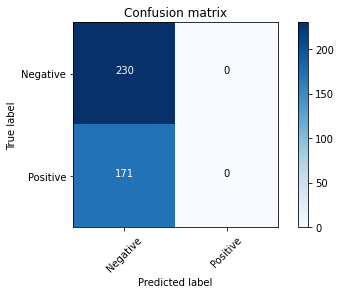

In [ ]:
# Predict model_a
model_a_score = predict(model_a, X_test, y_test)

13/13 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

    Negative       0.71      0.73      0.72       230
    Positive       0.62      0.60      0.61       171

    accuracy                           0.67       401
   macro avg       0.67      0.66      0.66       401
weighted avg       0.67      0.67      0.67       401

F1 Score:  0.6642206526255233


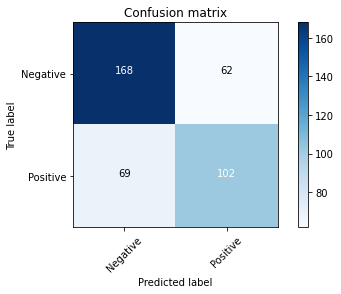

In [ ]:
# Predict model_b
model_b_score = predict(model_b, X_test, y_test)

13/13 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

    Negative       0.68      0.70      0.69       230
    Positive       0.58      0.56      0.57       171

    accuracy                           0.64       401
   macro avg       0.63      0.63      0.63       401
weighted avg       0.64      0.64      0.64       401

F1 Score:  0.6289524903481063


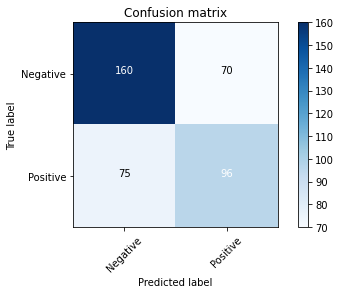

In [ ]:
# Predict model_c
model_c_score = predict(model_c, X_test, y_test)

13/13 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

    Negative       0.72      0.68      0.70       230
    Positive       0.60      0.64      0.62       171

    accuracy                           0.66       401
   macro avg       0.66      0.66      0.66       401
weighted avg       0.67      0.66      0.66       401

F1 Score:  0.6588524435201815


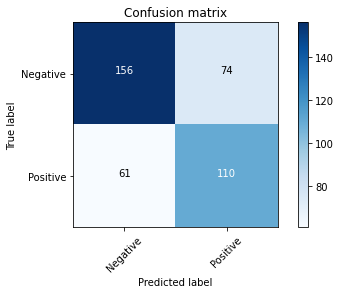

In [ ]:
# Predict model_d
model_d_score = predict(model_d, X_test, y_test)

In [ ]:
# # Predict random forest
# random_forest_score = predict(model_random_forest, X_test, y_test)

In [ ]:
results_fine_tuned = {"Model_A " : model_a_score,
          "Model_B" : model_b_score,
          "Model_C" : model_c_score,
          "Model_D": model_d_score}

# Print the results
print(results_fine_tuned)     

{'Model_A ': 0.57356608478803, 'Model_B': 0.6733167082294265, 'Model_C': 0.6384039900249376, 'Model_D': 0.6633416458852868}


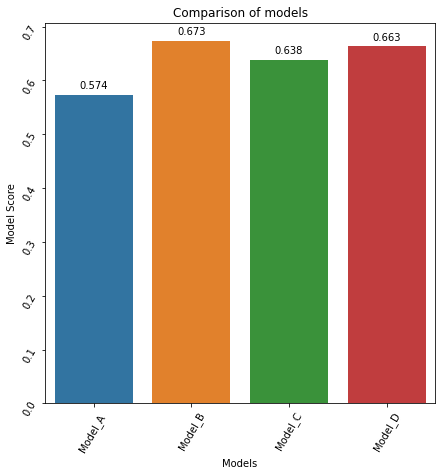

In [ ]:
plt.figure(figsize=(7, 7))
plt.title('Comparison of models')
plt.xlabel('Models')
plt.ylabel('Model Score')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plots = sns.barplot(x=[i for i in results_fine_tuned], y=[results_fine_tuned[i] for i in results_fine_tuned])
for p in plots.patches:
    plots.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [ ]:
# Plot bar chart for Comparison of models with plotly and different color for each bar
fig = px.bar(x=[i for i in results_fine_tuned], y=[results_fine_tuned[i] for i in results_fine_tuned], color=[i for i in results_fine_tuned], title='Comparison of models')
fig.show()

In [ ]:
# Save best model
model_b.save('model_b.h5')


# Save tokenizer
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    